In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import poisson
import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
np.set_printoptions(precision=4)
from time import monotonic
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual

In [23]:
monotonic()

43642.166142737

In [19]:
@interact
def plotaj(alfa = FloatSlider(min=0, max=2, value=1, step=0.1), beta = FloatSlider(min=0, max=2, value=1, step=0.01),
           shrani=True, korak_casa="0.1"):
    MAXLEN = 10000
    L0 = 50
    Z0 = 200
    dt=float(korak_casa)
    zajci, lisice = np.full((2,MAXLEN), np.nan)
    for i in range(MAXLEN):
        if i == 0:
            zajci[i] = Z0
            lisice[i] = L0
            continue
        zn, ln = zajci[i-1], lisice[i-1]
        zajci[i] = zn + poisson(np.abs(5*alfa*zn * dt)) - poisson(np.abs(4*alfa*zn*dt)) - poisson(np.abs(alfa*beta/L0*zn*ln*dt))
        lisice[i] = ln + poisson(np.abs(4*beta*ln*dt)) - poisson(np.abs(5*beta*ln*dt)) + poisson(np.abs(beta*alfa/Z0*zn*ln*dt))
        if zajci[i] <=1 or lisice[i] <=1:
            break
    z = zajci[~np.isnan(zajci) & ~np.isnan(lisice)]
    l = lisice[~np.isnan(zajci) & ~ np.isnan(lisice)]
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(l, z)
    plt.scatter(50, 200, c="k", s=30, zorder=1)
    plt.xlabel("lisice")
    plt.ylabel("zajci")
    plt.subplot(122)
    plt.plot(dt*np.array(range(len(z))), z, label="Zajci")
    plt.plot(dt*np.array(range(len(l))), l, label="Lisice")
    plt.xlabel("Čas")
    plt.legend()
    if shrani:
        plt.savefig(f"3-1-{int(monotonic())}.pdf")
    plt.show()
    
    print(f"Korakov: {len(z)}")

interactive(children=(FloatSlider(value=1.0, description='alfa', max=2.0), FloatSlider(value=1.0, description=…

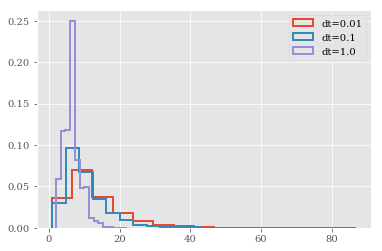

In [28]:
def povprecen_cas_ene_simulacije(dt):
    MAXLEN = 10000
    L0 = 50
    Z0 = 200
    alfa = 1
    beta = 1
    zajci, lisice = np.full((2,MAXLEN), np.nan)
    for i in range(MAXLEN):
        if i == 0:
            zajci[i] = Z0
            lisice[i] = L0
            continue
        zn, ln = zajci[i-1], lisice[i-1]
        zajci[i] = zn + poisson(np.abs(5*alfa*zn * dt)) - poisson(np.abs(4*alfa*zn*dt)) - poisson(np.abs(alfa*beta/L0*zn*ln*dt))
        lisice[i] = ln + poisson(np.abs(4*beta*ln*dt)) - poisson(np.abs(5*beta*ln*dt)) + poisson(np.abs(beta*alfa/Z0*zn*ln*dt))
        if zajci[i] <=1 or lisice[i] <=1:
            break
    z = zajci[~np.isnan(zajci) & ~np.isnan(lisice)]
    l = lisice[~np.isnan(zajci) & ~ np.isnan(lisice)]
    return len(z) * dt
data = pd.DataFrame(columns=["1", "10", "100"])
for col in data.columns:
    dt = int(col)/100
    data.loc[:, col] = [povprecen_cas_ene_simulacije(dt) for i in range(10000)]
data.to_csv("3-casi-prezivetja10000")
for col in data.columns:
    plt.hist(data[col], bins=15, label=f"dt={int(col)/100:0.2}", histtype="step", linewidth=2, normed=True)
plt.legend()
plt.show()

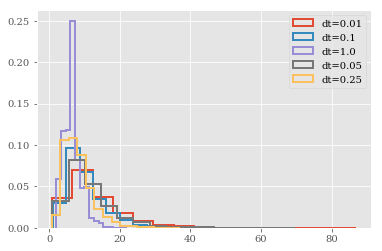

In [29]:
for col in ["5", "25"]:
    data[col] = 0
    dt = int(col)/100
    data.loc[:, col] = [povprecen_cas_ene_simulacije(dt) for i in range(10000)]
data.to_csv("3-casi-prezivetja10000")

for col in data.columns:
    plt.hist(data[col], bins=15, label=f"dt={int(col)/100:0.2}", histtype="step", linewidth=2, normed=True)
plt.legend()
plt.show()
    

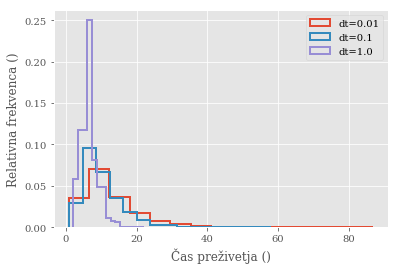

In [33]:
for col in ["1", "10", "100"]:
    plt.hist(data[col], bins=15, label=f"dt={int(col)/100:0.2}", histtype="step", linewidth=2, normed=True)
plt.legend()
plt.xlabel("Čas preživetja ()")
plt.ylabel("Relativna frekvenca ()")
plt.savefig("3-casi-prezivetja10000.pdf")
plt.show()

In [39]:


for col in data.columns:
    print(f"Za časovni korak {int(col)/100} je povprečje {np.mean(data[col])}")

Za časovni korak 0.01 je povprečje 12.380311
Za časovni korak 0.1 je povprečje 10.27858
Za časovni korak 1.0 je povprečje 6.4028
Za časovni korak 0.05 je povprečje 11.405000000000001
Za časovni korak 0.25 je povprečje 8.183525


ValueError: invalid literal for int() with base 10: '0.1'

In [70]:
povprecja = {}
stdji = {}
#data.drop(labels=["0.1"], axis=1, inplace=True)
for col in data.columns:
    dt = float(col)/100
    povprecja[dt] = np.mean(data[col])
    stdji[dt] = np.std(data[col])
analiza = pd.DataFrame(index=povprecja.keys())
analiza["povprecje"] = povprecja.values()
analiza["std"] = stdji.values()
analiza

,povprecje,std
0.01,12.380311,7.611619
0.10,10.278580,5.719481
1.00,6.402800,2.421931
0.05,11.405000,6.892369
0.25,8.183525,4.055558


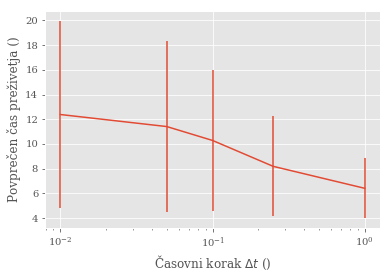

In [76]:
analiza.sort_index(inplace=True)
plt.errorbar(x = analiza.index, y= analiza.povprecje, yerr=analiza["std"])
plt.xlabel(r"Časovni korak $\Delta t$ ()")
plt.ylabel("Povprečen čas preživetja ()")
plt.semilogx()
plt.savefig("3-2-prezivetje-od-koraka.pdf")
plt.show()